In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tabulate

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#B8B8B8",
    "axes.edgecolor": "#000000",
    "grid.color": "#C4C4C4",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

# Data Load

In [ ]:
BASE_PATH = "/content/drive/MyDrive/ML_Data/Dacon/데이크루6기/신용카드 사기 거래 탐지/open"
TRAIN_PATH = os.path.join(BASE_PATH, "train.csv")
TEST_PATH = os.path.join(BASE_PATH, "test.csv")

In [ ]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


* 만 21세 ~ 만 69세
* DAYS_EMPLOYED > 0의 의미? => 무직

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

* 변수 occyp_type 결측치 존재 => 무직?

* index
* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

* edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

* family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

* house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

* DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

* DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부
* work_phone: 업무용 전화 소유 여부
* phone: 전화 소유 여부
* email: 이메일 소유 여부
* occyp_type: 직업 유형
* family_size: 가족 규모
* begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

# Data Preprocessing

In [ ]:
train['FLAG_MOBIL'] = train['FLAG_MOBIL'].astype('object')

train['phone'] = train['phone'].astype('object')

In [ ]:
train.select_dtypes(exclude='number')

,gender,car,reality,income_type,edu_type,family_type,house_type,FLAG_MOBIL,phone,occyp_type
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,1,0,NaN
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,Laborers
2,M,Y,Y,Working,Higher education,Married,House / apartment,1,1,Managers
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,Sales staff
4,F,Y,Y,State servant,Higher education,Married,House / apartment,1,0,Managers
...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,State servant,Secondary / secondary special,Married,House / apartment,1,0,Core staff
26453,F,N,Y,Working,Higher education,Separated,House / apartment,1,0,NaN
26454,F,Y,N,Working,Secondary / secondary special,Civil marriage,With parents,1,0,Core staff
26455,M,N,Y,Working,Incomplete higher,Single / not married,House / apartment,1,0,Laborers


In [ ]:
train['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

In [ ]:
train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

* FLAG_MOBIL column is useless

In [ ]:
train = train.drop(columns=["index", "FLAG_MOBIL"])
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
# Data preprocessing for convenience and readability

# process abnormal data
# occyp_type == NaN => "No job"
# DAYS_EMPLOYED > 0 => 0
train["occyp_type"] = train["occyp_type"].fillna("No job")
train.loc[train["DAYS_EMPLOYED"] > 0, "DAYS_EMPLOYED"] = 0

train["DAYS_BIRTH"] = (train["DAYS_BIRTH"] * -1) / 365.0
train["DAYS_EMPLOYED"] = (train["DAYS_EMPLOYED"] * -1) / 365.0
train["begin_month"] = (train["begin_month"] * -1)

train["credit"] = train["credit"].map({0:"High", 1:"Medium", 2:"Low"})

# integer data {0, 1} to {"N", "Y"}
train["work_phone"] = train["work_phone"].map({0:'N', 1:'Y'})
train["phone"] = train["phone"].map({0:'N', 1:'Y'})
train["email"] = train["email"].map({0:'N', 1:'Y'})

In [ ]:
train_obj = train.select_dtypes(exclude="number")
train_obj["credit"] = train["credit"]
train_num = train.select_dtypes(include="number")
train_num["credit"] = train["credit"]

In [38]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [ ]:
print(train_obj.columns)
print(train_num.columns)

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'work_phone', 'phone', 'email', 'occyp_type', 'credit'],
      dtype='object')
Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'family_size', 'begin_month', 'credit'],
      dtype='object')


In [37]:
round(train_obj["occyp_type"].value_counts(normalize=True) * 100, 2)

No job                   30.88
Laborers                 17.05
Core staff               10.00
Sales staff               9.60
Managers                  8.19
Drivers                   5.95
High skill tech staff     3.93
Accountants               3.41
Medicine staff            3.27
Cooking staff             1.73
Security staff            1.60
Cleaning staff            1.52
Private service staff     0.92
Low-skill Laborers        0.48
Waiters/barmen staff      0.47
Secretaries               0.37
Realty agents             0.24
HR staff                  0.23
IT staff                  0.15
Name: occyp_type, dtype: float64

In [ ]:
# train 데이터의 카테고리 컬럼들을 추출합니다.
categories = train.select_dtypes(exclude='number')

# 추출한 변수들의 값들의 비율을 확인합니다.
for feature in categories:
  print(train[feature].value_counts(normalize=True))
  print('-'*50)

F    0.668897
M    0.331103
Name: gender, dtype: float64
--------------------------------------------------
N    0.620252
Y    0.379748
Name: car, dtype: float64
--------------------------------------------------
Y    0.673924
N    0.326076
Name: reality, dtype: float64
--------------------------------------------------
Working                 0.515743
Commercial associate    0.234418
Pensioner               0.168160
State servant           0.081415
Student                 0.000265
Name: income_type, dtype: float64
--------------------------------------------------
Secondary / secondary special    0.680160
Higher education                 0.270703
Incomplete higher                0.038553
Lower secondary                  0.009714
Academic degree                  0.000869
Name: edu_type, dtype: float64
--------------------------------------------------
Married                 0.687757
Single / not married    0.132139
Civil marriage          0.080243
Separated               0.058170
Wido

In [ ]:
color = ["#FA5858", "#2EFE2E", "#0040FF"]

<Axes: xlabel='credit', ylabel='Count'>

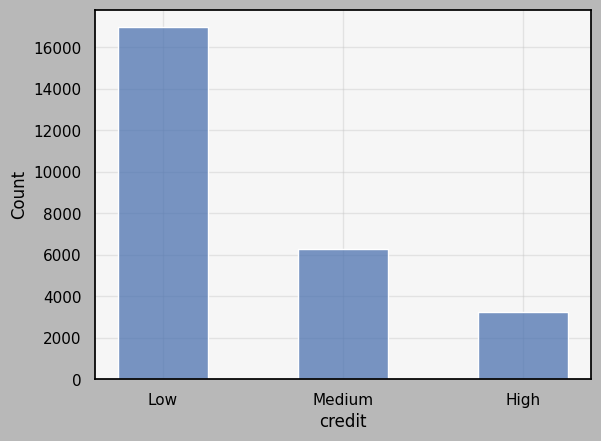

In [ ]:
sorted_cols = ["Low", "Medium", "High"]
train["credit"] = pd.Categorical(train["credit"], sorted_cols)

sns.histplot(data=train, x="credit", shrink=0.5)

In [ ]:
round(train["credit"].value_counts(normalize=True) * 100, 2).astype(str) + "%"

Low       64.13%
Medium    23.69%
High      12.18%
Name: credit, dtype: object

# Category Column EDA

In [ ]:
train_obj["income_type"].value_counts().sort_values(ascending=False).index.tolist()

['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student']

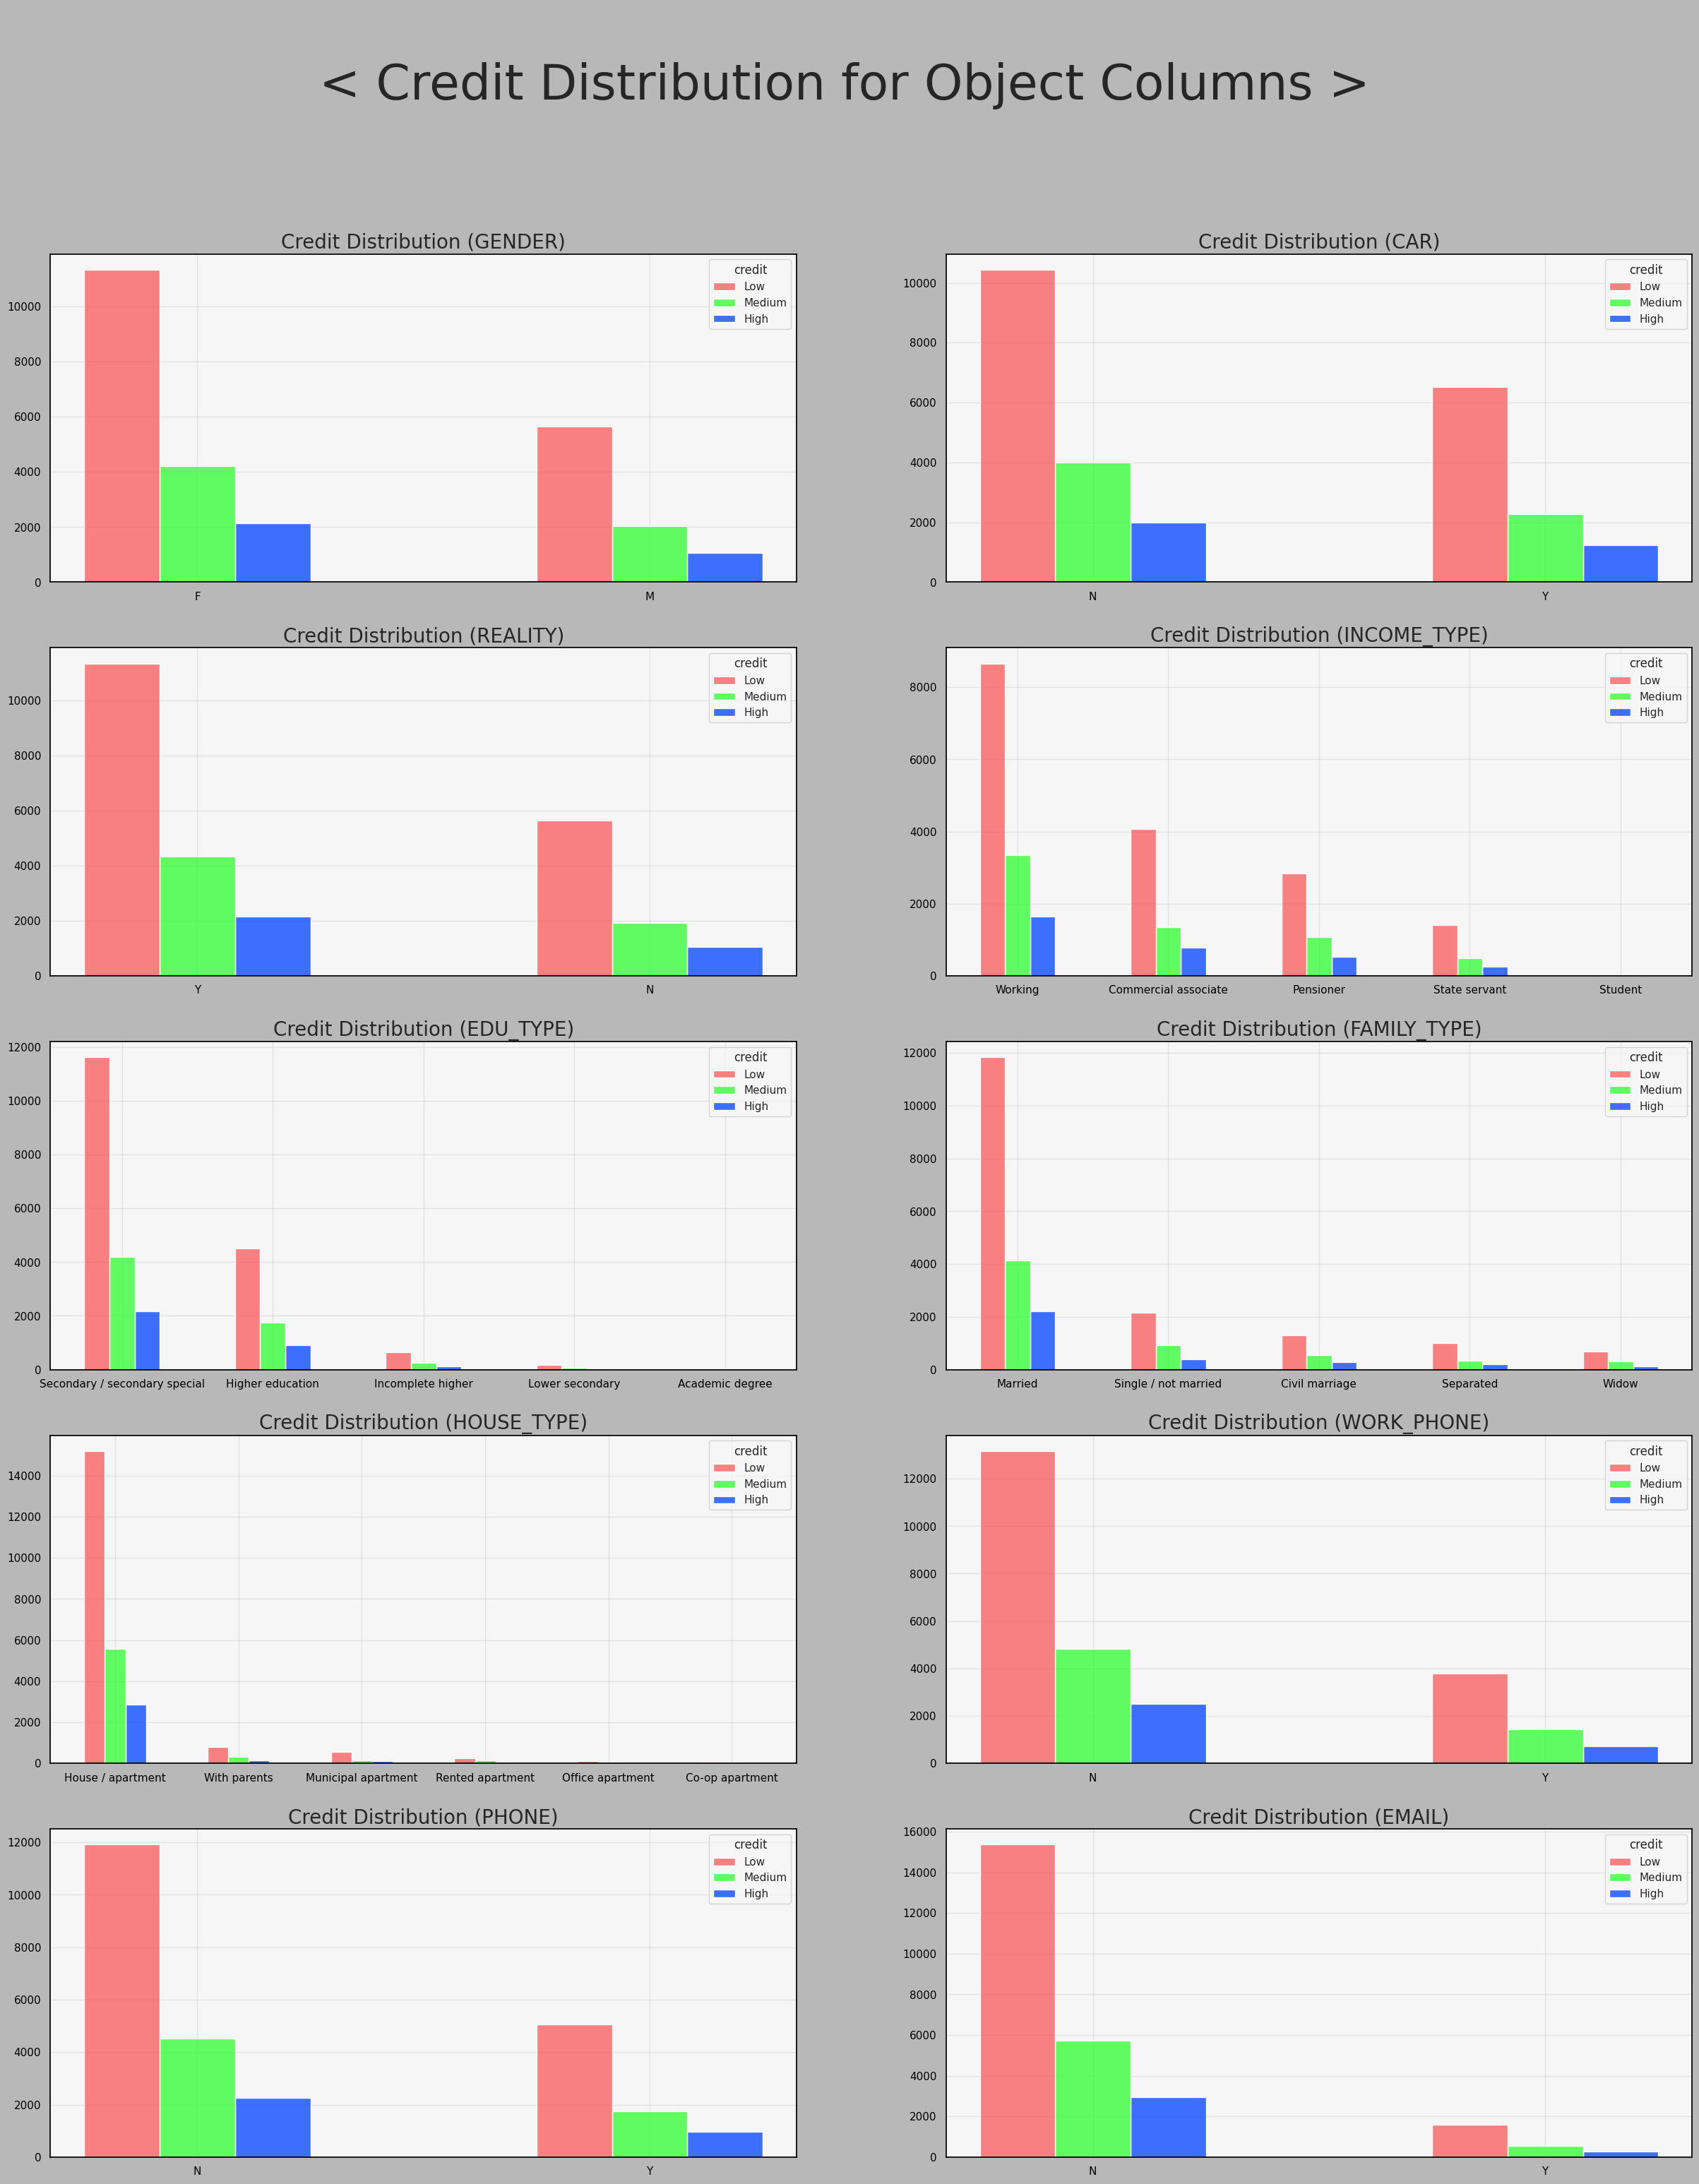

In [ ]:
# object columns EDA (without 'occyp_type')

obj_EDA_cols = train_obj.columns[:-2]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 35))
axes = axes.flatten()

for i, col in enumerate(obj_EDA_cols):
  ax = axes[i]
  # sort column in descending order
  sorted_col = train_obj[col].value_counts().sort_values(ascending=False).index

  train_obj[col] = pd.Categorical(train_obj[col], sorted_col)

  sns.histplot(data=train_obj, x=col, hue="credit", binwidth=0.5, shrink=0.5,
               palette=color, ax=ax, multiple="dodge", hue_order=["Low", "Medium", "High"])
  ax.set_title(f'Credit Distribution ({col.upper()})', fontsize=20)
  ax.set_ylabel("")
  ax.set_xlabel("")

plt.suptitle("\n< Credit Distribution for Object Columns >", fontsize=50)
plt.show()

In [ ]:
# Make a chart the proportions of each variables into a table

output_table = []

for i, col in enumerate(obj_EDA_cols):
  sorted_col = train_obj[col].value_counts().sort_values(ascending=False).index

  if len(sorted_col) == 2:
    type1 = sorted_col[0];  type2 = sorted_col[1];

    df1 = train_obj[train_obj[col] == type1]
    df2 = train_obj[train_obj[col] == type2]

    output_table.append([col,
                        f'{type1}: {round((len(df1)/len(train_obj)) * 100, 2)}%',
                        round(df1['credit'].value_counts(normalize=True) * 100, 2).astype("str") + "%",
                        f'{type2}: {round((len(df2)/len(train_obj)) * 100, 2)}%',
                        round(df2['credit'].value_counts(normalize=True) * 100, 2).astype("str") + "%"])
  else:
    types = [i for i in sorted_col]

    dfs = [train_obj[train_obj[col] == types[i]] for i in range(5)]

    output_row = [col]
    for j, df in enumerate(dfs):
        output_row.extend([
            f'{types[j]}: {round((len(df) / len(train_obj)) * 100, 2)}%',
            f'{round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"}'
        ])
    output_table.append(output_row)

print(tabulate(output_table, headers=['Variable', 'Type 1', 'Credit Distribution', 'Type 2', 'Credit Distribution',
                                      'Type 3', 'Credit Distribution', 'Type 4', 'Credit Distribution',
                                      'Type 5', 'Credit Distribution'], tablefmt='grid'))

+-------------+---------------------------------------+-----------------------------+------------------------------+-----------------------------+----------------------------+-----------------------------+-------------------------+-----------------------------+-------------------------+-----------------------------+
| Variable    | Type 1                                | Credit Distribution         | Type 2                       | Credit Distribution         | Type 3                     | Credit Distribution         | Type 4                  | Credit Distribution         | Type 5                  | Credit Distribution         |
+=============+=======================================+=============================+==============================+=============================+============================+=============================+=========================+=============================+=========================+=============================+
| gender      | F: 66.89%                     

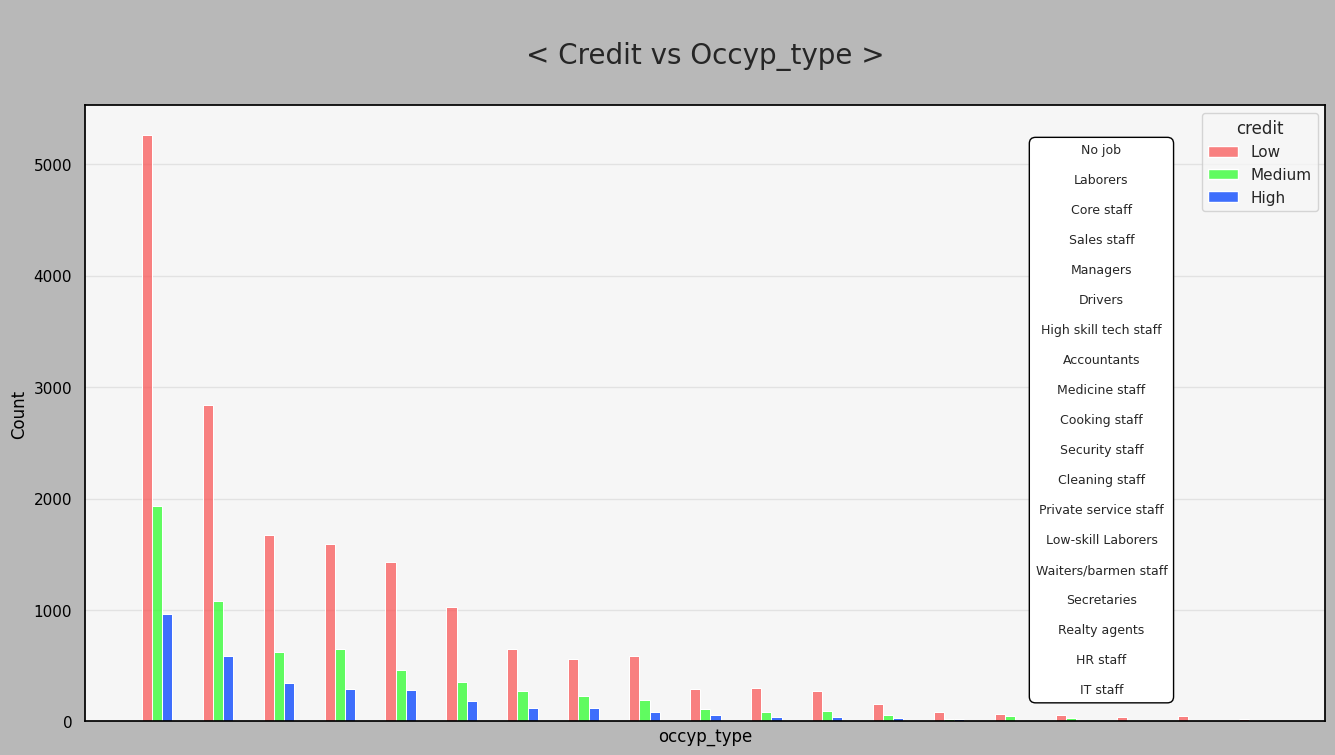

In [ ]:
# object column EDA (Occyp_type)

plt.figure(figsize=(16,8))

sorted_col = train_obj['occyp_type'].value_counts().sort_values(ascending=False).index

train_obj['occyp_type'] = pd.Categorical(train_obj['occyp_type'], sorted_col)

sns.histplot(data=train_obj, x="occyp_type", hue="credit", binwidth=0.5, shrink=0.5,
             palette=color, multiple="dodge", hue_order=["Low", "Medium", "High"])
plt.xticks([])

plt.text(x=len(sorted_col)//2 + 6.5, y=250, s='\n\n'.join(sorted_col), fontsize=9, ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('\n< Credit vs Occyp_type >', pad=30, fontsize=20)
plt.show()

In [ ]:
print(round(train_obj['occyp_type'].value_counts(normalize=True) * 100, 2).astype('str') + '%')

No job                   30.88%
Laborers                 17.05%
Core staff                10.0%
Sales staff                9.6%
Managers                  8.19%
Drivers                   5.95%
High skill tech staff     3.93%
Accountants               3.41%
Medicine staff            3.27%
Cooking staff             1.73%
Security staff             1.6%
Cleaning staff            1.52%
Private service staff     0.92%
Low-skill Laborers        0.48%
Waiters/barmen staff      0.47%
Secretaries               0.37%
Realty agents             0.24%
HR staff                  0.23%
IT staff                  0.15%
Name: occyp_type, dtype: object


In [ ]:
occyps = train_obj['occyp_type'].value_counts().index
occyps

CategoricalIndex(['No job', 'Laborers', 'Core staff', 'Sales staff',
                  'Managers', 'Drivers', 'High skill tech staff',
                  'Accountants', 'Medicine staff', 'Cooking staff',
                  'Security staff', 'Cleaning staff', 'Private service staff',
                  'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries',
                  'Realty agents', 'HR staff', 'IT staff'],
                 categories=['No job', 'Laborers', 'Core staff', 'Sales staff', ..., 'Secretaries', 'Realty agents', 'HR staff', 'IT staff'], ordered=False, dtype='category')

In [ ]:
output_table = []

occyps = train_obj['occyp_type'].value_counts().index

dfs = [train_obj[train_obj['occyp_type'] == occyps[i]] for i in range(len(occyps))]

for i, df in enumerate(dfs):
  output_table.append([occyps[i],
                      f'{round((len(df) / len(train_obj)) * 100, 2)}%',
                      round(df["credit"].value_counts(normalize=True) * 100, 2).astype("str") + "%"])

print(tabulate(output_table, headers=['Occyp Type', 'Proportion', 'Credit Distribution'], tablefmt='grid'))

+-----------------------+--------------+-----------------------------+
| Occyp Type            | Proportion   | Credit Distribution         |
+=======================+==============+=============================+
| No job                | 30.88%       | Low       64.45%            |
|                       |              | Medium    23.72%            |
|                       |              | High      11.83%            |
|                       |              | Name: credit, dtype: object |
+-----------------------+--------------+-----------------------------+
| Laborers              | 17.05%       | Low       63.03%            |
|                       |              | Medium    23.98%            |
|                       |              | High      12.99%            |
|                       |              | Name: credit, dtype: object |
+-----------------------+--------------+-----------------------------+
| Core staff            | 10.0%        | Low       63.38%            |
|     

# Numeric Column EDA

<ipython-input-35-ad7082002752>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_num.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=1, cbar=False)


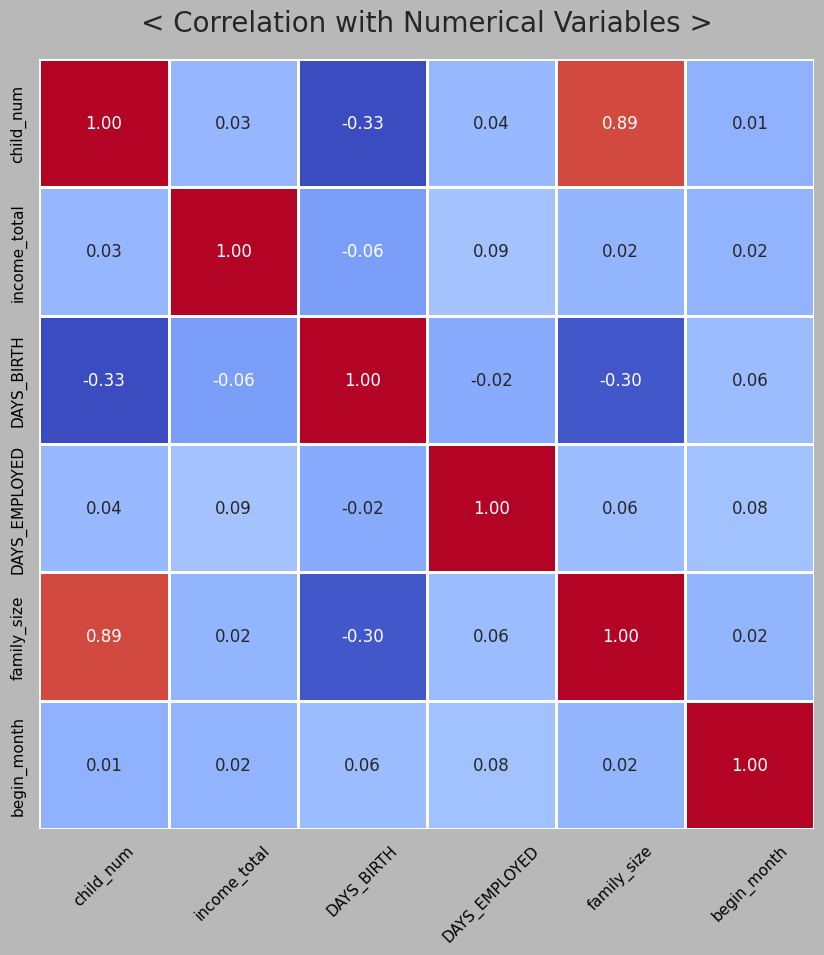

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_num.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=1, cbar=False)
plt.xticks(rotation=45)
plt.title("< Correlation with Numerical Variables >", pad=20, fontsize=20)
plt.show()

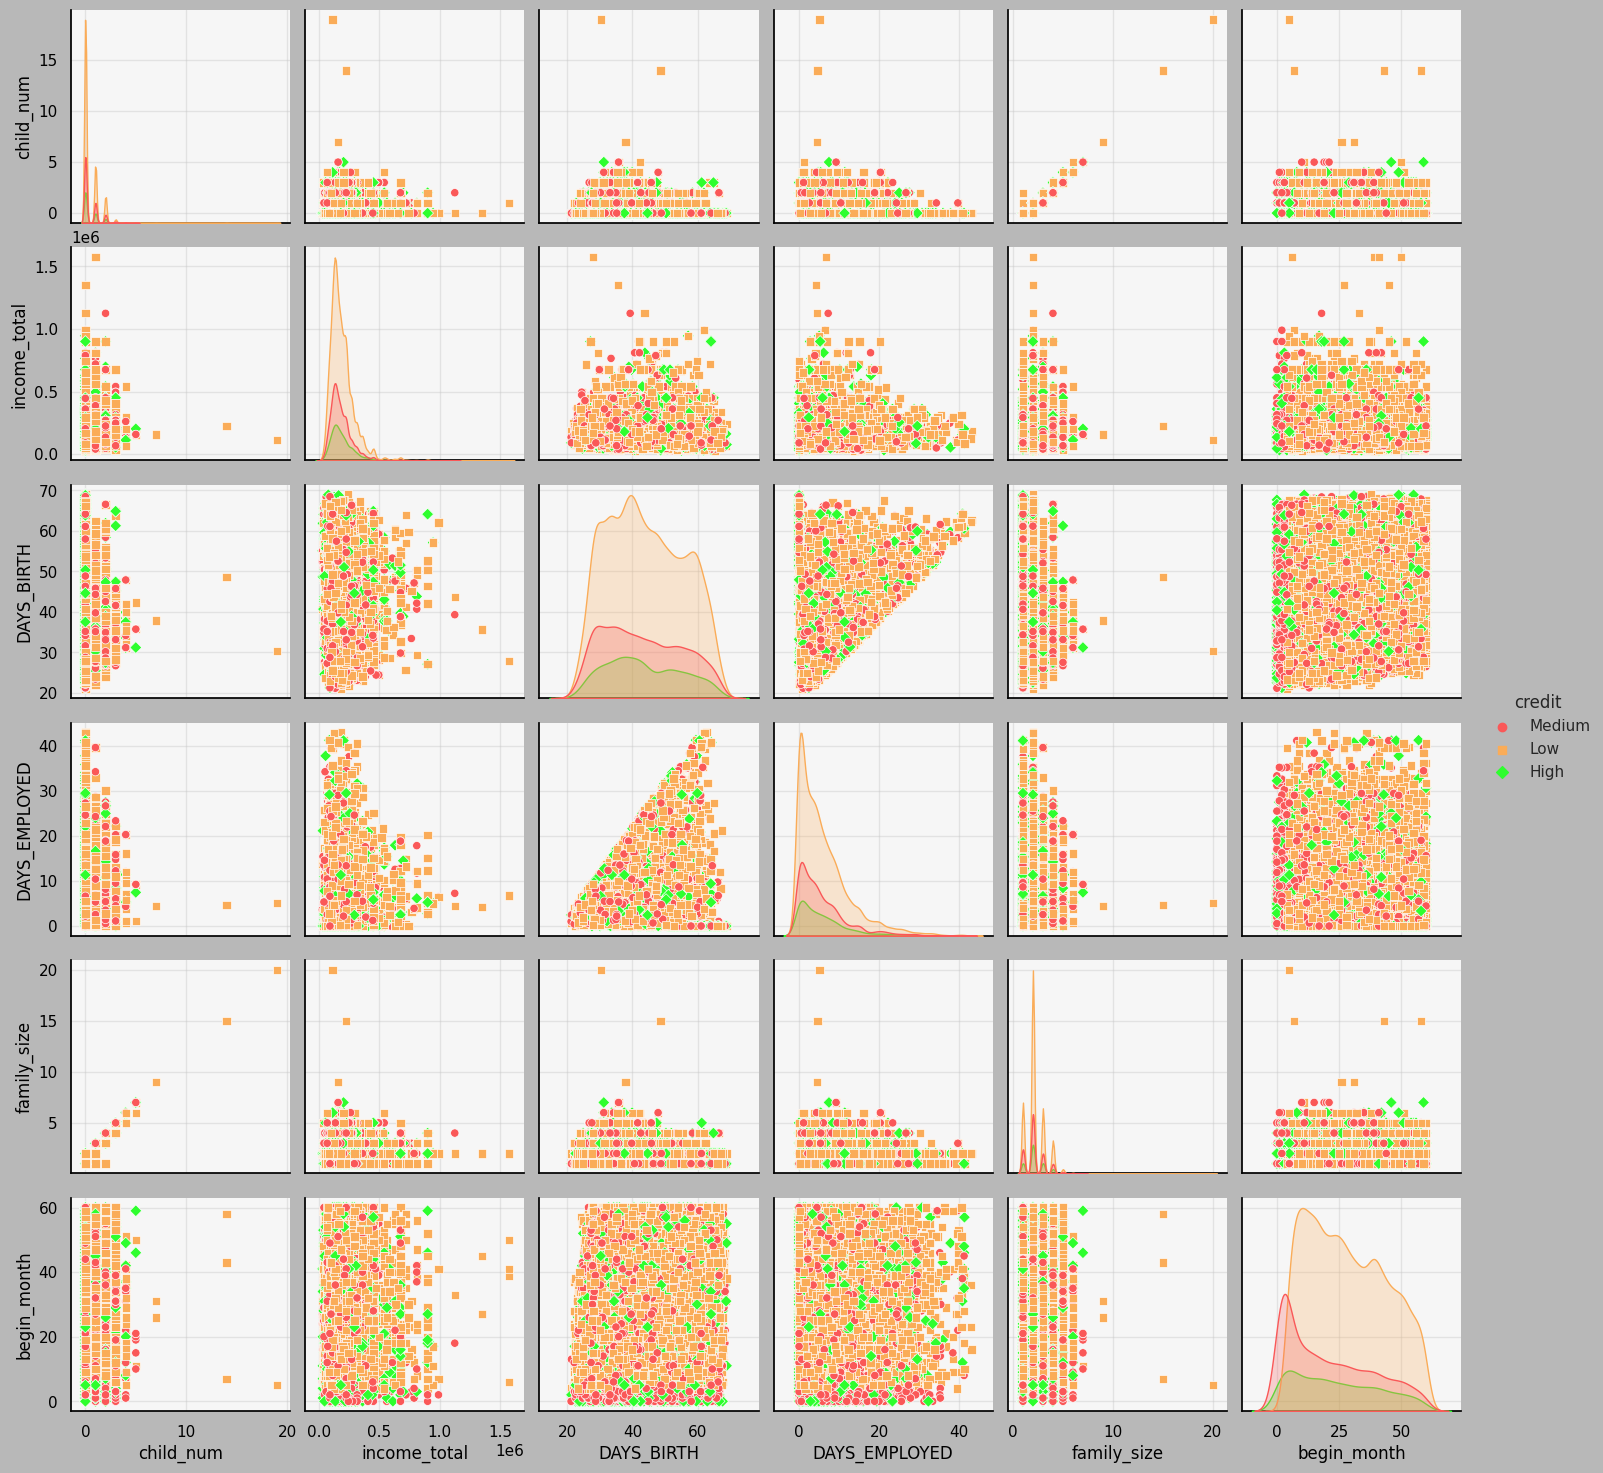

In [ ]:
sns.pairplot(train_num, hue="credit", markers=["o", "s", "D"], palette=color)

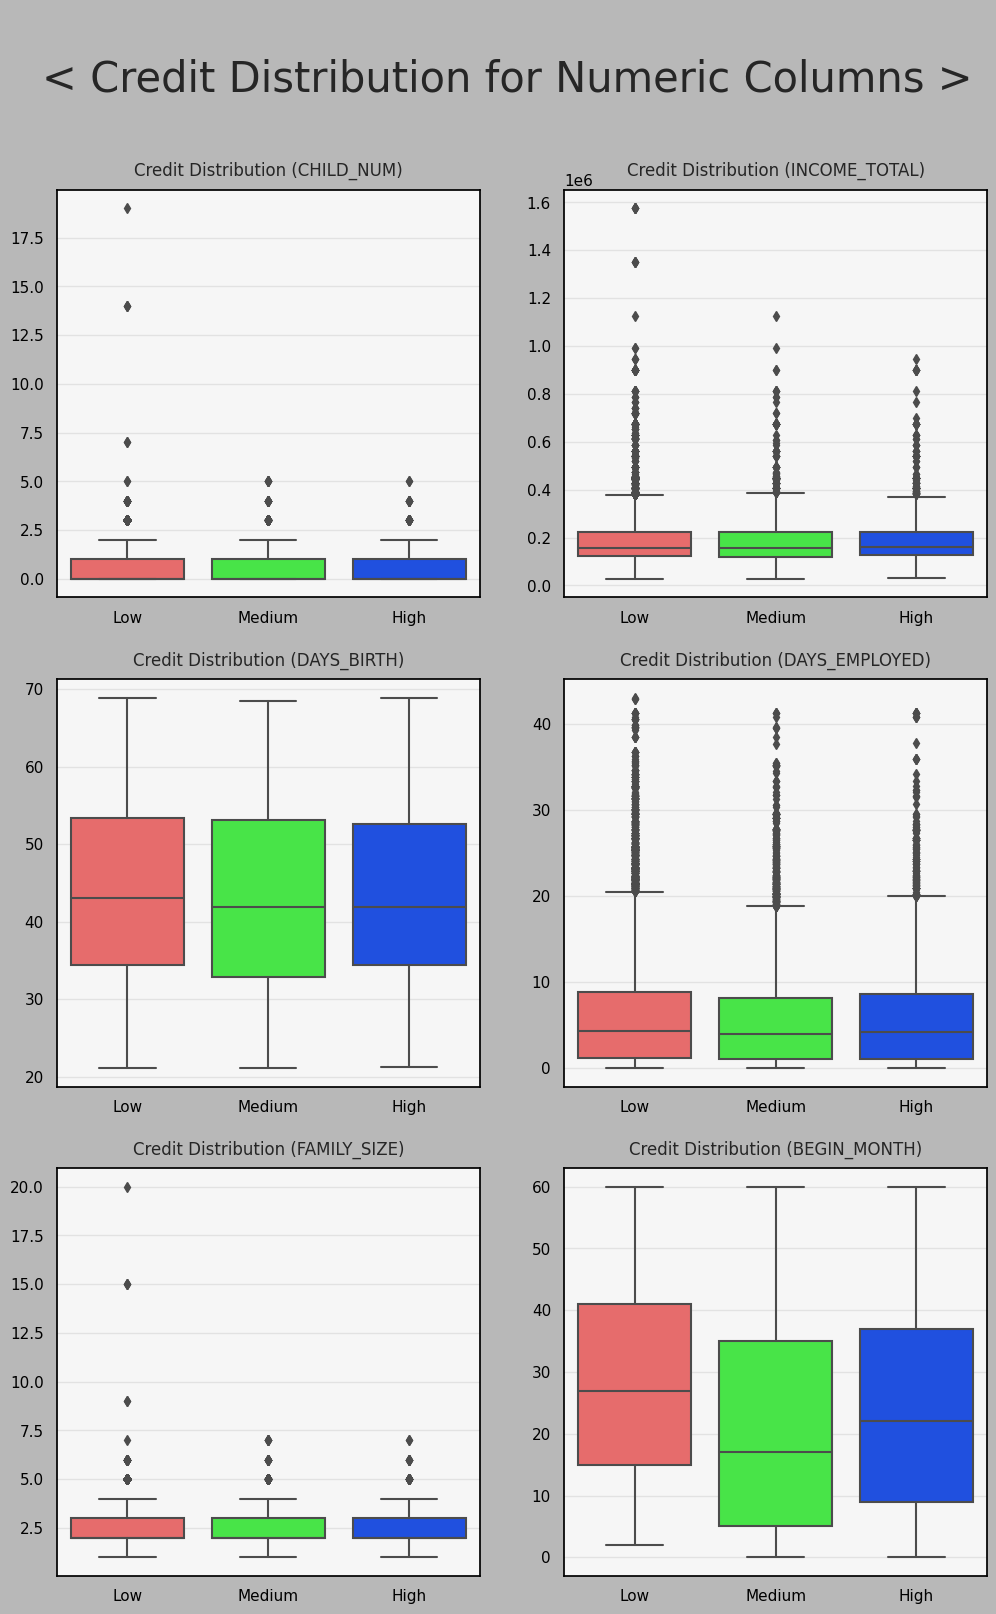

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,18))
axes = axes.flatten()

num_eda_cols = train_num.columns[:-1]

for i, col in enumerate(num_eda_cols):
  sns.boxplot(data=train_num, y=col, x="credit", order=["Low","Medium","High"],
              ax=axes[i], palette=color)
  axes[i].set_title(f"Credit Distribution ({col.upper()})", pad=10)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

plt.suptitle("\n< Credit Distribution for Numeric Columns >", fontsize=30)
plt.show()

* Credit이 Low인 사람들은 비교적 BEGIN_MONTH가 큼

In [ ]:
train_num["child_num"].value_counts(normalize=True)

0     0.693200
1     0.203576
2     0.089277
3     0.011566
4     0.001776
5     0.000378
14    0.000113
7     0.000076
19    0.000038
Name: child_num, dtype: float64

In [ ]:
# split the train_num dataframe depends on credit status

train_num_L = train_num[train_num["credit"] == "Low"]
train_num_M = train_num[train_num["credit"] == "Medium"]
train_num_H = train_num[train_num["credit"] == "High"]

In [ ]:
train_num_child_many = train_num[train_num["child_num"] > 3]

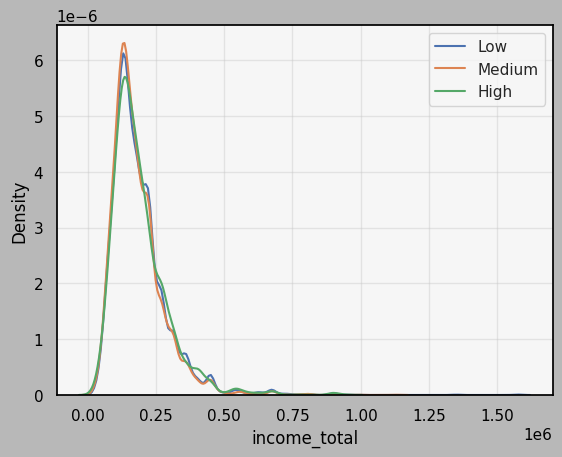

In [ ]:
sns.kdeplot(train_num_L["income_total"], label="Low")
sns.kdeplot(train_num_M["income_total"], label="Medium")
sns.kdeplot(train_num_H["income_total"], label="High")

plt.legend()

# 결론
* 전체적인 Credit 데이터는 Low 64.13%, Medium 23.69%, High 12.18%의 분포를 가지고 있다.
* Categorical 변수들의 경우 균등하게 배분되어 있지 않으므로 가중치를 주거나, 오버샘플링 등의 기법을 생각해볼 수 있다.
* 직업 타입인 `occyp_type` 변수에서 직업에 따라 신용도의 분포가 다른 것을 확인해볼 수 있었다.
* Numerical 변수에서는 "Low"인 사람들의 `begin_month` 분포가 큰 쪽에 있는 것을 볼 수 있었다.
* Numerical 변수에서 skewed 데이터가 많아서 조정이 필요해보인다.
* `child_num`, `family_size`는 이상치 데이터(5 이상)를 처리할 필요가 있어 보인다. 어쩌면 categorical 변수로 바꾸는 것도 생각해볼 수 있을 듯.